# Simulator -  Experiments Part 3
**Isabel Gernand, Maximilian Schell**

We run a series of different experiments to simulate the spread of COVID19 and the effect of different countermeasures.

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

from covid_abs.graphics import *
from covid_abs.experiments import *
from covid_abs.network.graph_abs import *
from covid_abs.network.util import *

from covid_abs.graphics import  *
from covid_abs.train import trainRL
from covid_abs.rlagent import *

In this notebook, we run some additional experiments. We restrict ourselves to a couple of countermeasures, but experiments could in general be performed for all interventions, stages and policies.


## Policy Increasing

In [2]:
pol1 = dict(
    name='pol1',
    policy = 'increasing'
)
from covid_abs.network.graph_abs import *

batch_experiment(20, 1440, "pol1.csv",
                     simulation_type=GraphSimulation,
                     verbose='experiments',
                     **{**pol1}
                     )

Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
Experiment 10
Experiment 11
Experiment 12
Experiment 13
Experiment 14
Experiment 15
Experiment 16
Experiment 17
Experiment 18
Experiment 19


,Iteration,Metric,Min,Avg,Std,Max
0,0,Q1,0.011683,0.049268,0.020925,0.092387
1,0,Q2,0.033694,0.052807,0.010876,0.075708
2,0,Q3,0.043994,0.074300,0.017104,0.108969
3,0,Q4,0.109188,0.132760,0.015869,0.168971
4,0,Q5,0.234210,0.351361,0.055007,0.476060
...,...,...,...,...,...,...
20155,1439,Recovered_Immune,0.573333,0.640667,0.024304,0.680000
20156,1439,Death,0.250000,0.313000,0.028556,0.376667
20157,1439,Asymptomatic,0.623333,0.687000,0.028556,0.750000
20158,1439,Symptomatic,0.000000,0.000000,0.000000,0.000000


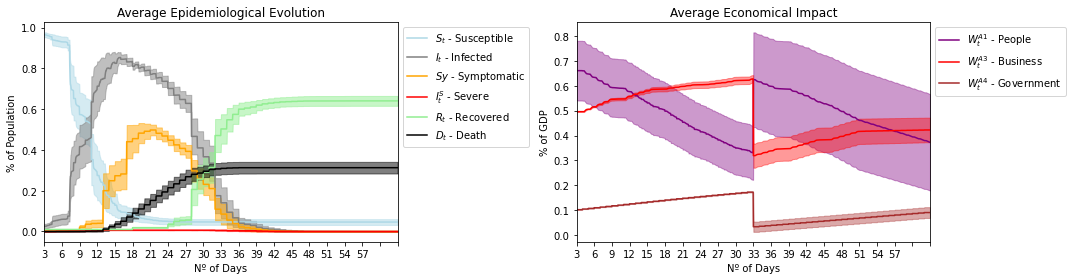

In [3]:
from covid_abs.experiments import plot_graph_batch_results

df = pd.read_csv('pol1.csv')

plot_graph_batch_results(df)

plt.tight_layout()

## Policy Decreasing

In [5]:
pol2 = dict(
    name='pol2',
    policy = 'decreasing'
)

batch_experiment(20, 1440, "pol2.csv",
                     simulation_type=GraphSimulation,
                     verbose='experiments',
                     **{**pol2}
                     )

Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
Experiment 10
Experiment 11
Experiment 12
Experiment 13
Experiment 14
Experiment 15
Experiment 16
Experiment 17
Experiment 18
Experiment 19


,Iteration,Metric,Min,Avg,Std,Max
0,0,Q1,0.034448,0.052886,0.010979,0.074506
1,0,Q2,0.031816,0.057472,0.015910,0.093948
2,0,Q3,0.046877,0.066156,0.012955,0.097843
3,0,Q4,0.104602,0.132425,0.014338,0.157901
4,0,Q5,0.252245,0.362551,0.039999,0.427547
...,...,...,...,...,...,...
20155,1439,Recovered_Immune,0.016667,0.330833,0.307524,0.670000
20156,1439,Death,0.000000,0.158667,0.158547,0.376667
20157,1439,Asymptomatic,0.623333,0.841000,0.158847,1.000000
20158,1439,Symptomatic,0.000000,0.000167,0.000726,0.003333


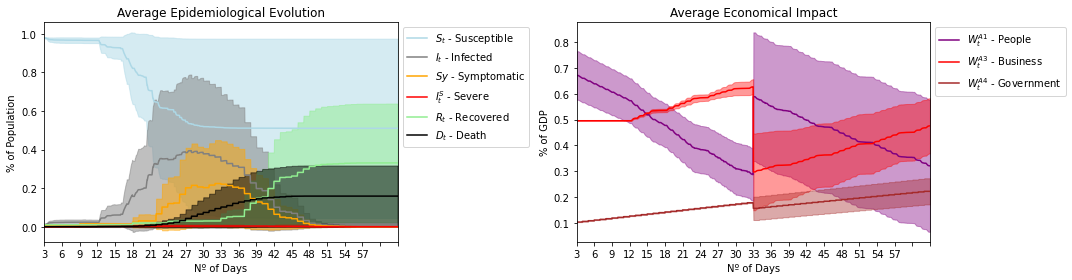

In [6]:
from covid_abs.experiments import plot_graph_batch_results

df = pd.read_csv('pol2.csv')

plot_graph_batch_results(df)

plt.tight_layout()

## Policy Hospcap

In [7]:
pol3 = dict(
    name='pol3',
    policy = 'hospcap'
)

batch_experiment(20, 1440, "pol3.csv",
                     simulation_type=GraphSimulation,
                     verbose='experiments',
                     **{**pol3}
                     )

Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
Experiment 10
Experiment 11
Experiment 12
Experiment 13
Experiment 14
Experiment 15
Experiment 16
Experiment 17
Experiment 18
Experiment 19


,Iteration,Metric,Min,Avg,Std,Max
0,0,Q1,0.027345,0.051635,0.012231,0.078250
1,0,Q2,0.035400,0.058673,0.016213,0.088821
2,0,Q3,0.045538,0.068432,0.014402,0.100209
3,0,Q4,0.100586,0.127378,0.014299,0.161009
4,0,Q5,0.262392,0.362473,0.047637,0.434642
...,...,...,...,...,...,...
20155,1439,Recovered_Immune,0.016667,0.221333,0.180608,0.550000
20156,1439,Death,0.000000,0.107667,0.095853,0.270000
20157,1439,Asymptomatic,0.630000,0.868667,0.121085,1.000000
20158,1439,Symptomatic,0.000000,0.022500,0.054619,0.196667


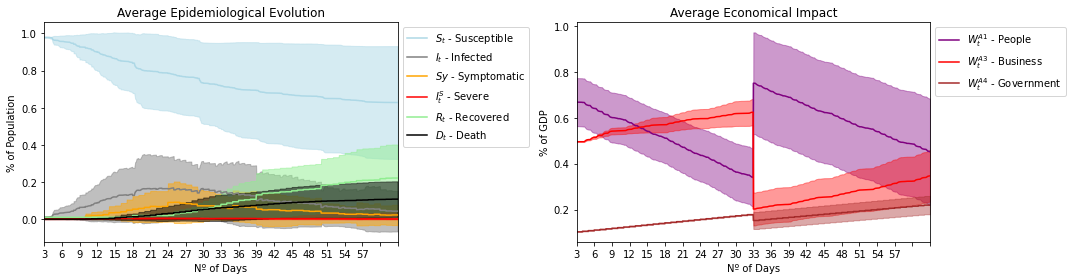

In [8]:
from covid_abs.experiments import plot_graph_batch_results

df = pd.read_csv('pol3.csv')

plot_graph_batch_results(df)

plt.tight_layout()

In [9]:
def get_label(ix):
    return 'pol {}'.format(ix)

def get_name(ix):
    return 'pol{}'.format(ix)

def get_df(ix):
    return pd.read_csv(get_name(ix)+".csv")

### Evolution of Deaths

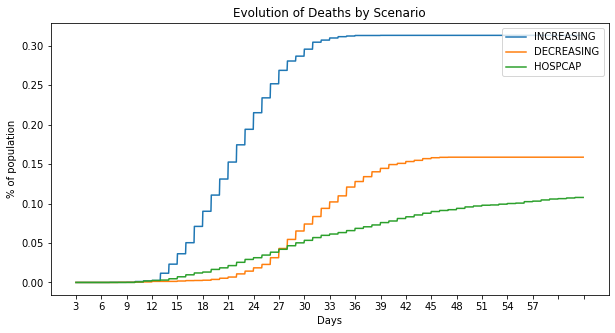

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 5])
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)
for i in range(1,4):
    df = get_df(i)[['Iteration','Metric','Avg']]
    df2 = df[(df['Metric'] == 'Death')]
    ax.plot(df2['Avg'].values, label=get_label(i))

tick_unit=72

ax.set_title("Evolution of Deaths by Scenario")
ax.set_ylabel("% of population")
ax.set_xlabel("Days")
tickslabels = [str(i//24) for i in range(0, 1440, tick_unit)]
ax.xaxis.set_major_locator(MultipleLocator(tick_unit))
ax.set_xticklabels(tickslabels)

handles, labels = ax.get_legend_handles_labels()
#lgd = ax.legend(handles, labels, loc='upper right')
lgd = ax.legend(handles, ['INCREASING','DECREASING', 'HOSPCAP', 'tests', 'contact tracing', 'limited mobility'], loc='upper right')

## Evolution of Infections

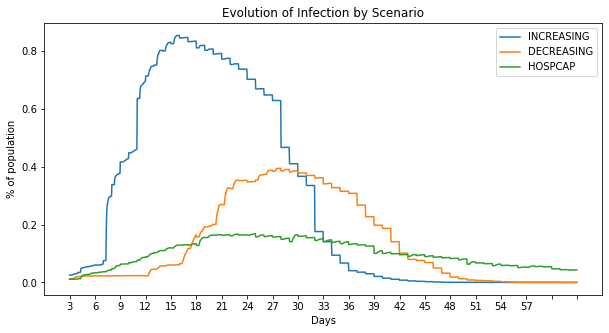

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 5])
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)
for i in range(1,4):
    df = get_df(i)[['Iteration','Metric','Avg']]
    df2 = df[(df['Metric'] == 'Infected')]
    ax.plot(df2['Avg'].values, label=get_label(i))

tick_unit=72

ax.set_title("Evolution of Infection by Scenario")
ax.set_ylabel("% of population")
ax.set_xlabel("Days")
tickslabels = [str(i//24) for i in range(0, 1440, tick_unit)]
ax.xaxis.set_major_locator(MultipleLocator(tick_unit))
ax.set_xticklabels(tickslabels)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, ['INCREASING','DECREASING', 'HOSPCAP', 'tests', 'contact tracing', 'limited mobility'], loc='upper right')

## GDP

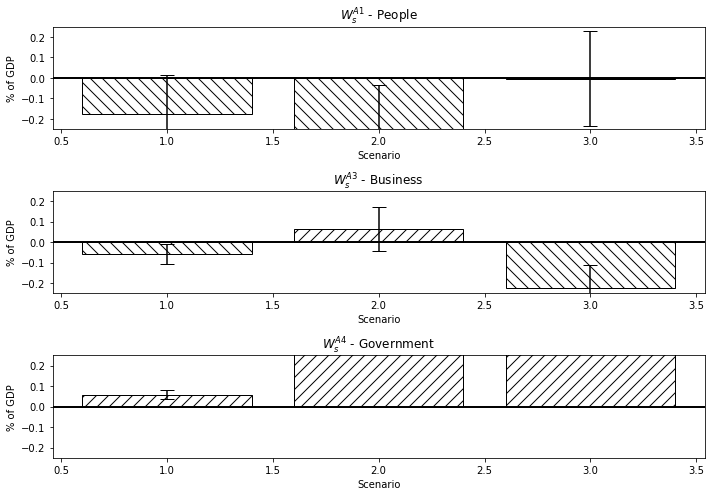

In [18]:
from covid_abs.graphics import legend_ecom
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

A1 = ['Q1','Q2','Q3','Q4','Q5']

legend = {'A1': '$W^{A1}_s$ - People',
          'Business': '$W^{A3}_s$ - Business',
          'Government': '$W^{A4}_s$ - Government',}

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[10, 7])

metrics = [k for k in legend.keys()]

baseline = {'A1': 0.0 }
baseline_stop = {'A1': 0.0 }
df = get_df(0)
for cm, metric in enumerate(legend_ecom.keys()):
    mx_it = np.max(df['Iteration'].values)
    _start = df[(df['Metric'] == metric) & (df['Iteration'] == 0)]['Avg'].values[-1]
    _stop = df[(df['Metric'] == metric) & (df['Iteration'] == mx_it)]['Avg'].values[-1]
    diff = _start - _stop
    if metric in A1:
        baseline['A1'] += diff
        baseline_stop['A1'] += _stop
    else:
        baseline[metric] = diff
        baseline_stop[metric] = _stop

values = {}
colors = {}
std = {}

for i in range(1,4):                                   
    df = get_df(i)
    for cm, metric in enumerate(metrics):
        if metric not in values:
            values[metric] = []
            colors[metric] = []
            std[metric] = []
    
        mx_it = np.max(df['Iteration'].values)

        if metric == 'A1':
            _stop = 0
            _std = 0
            for m2 in A1:
                _stop += df[(df['Metric'] == m2) & (df['Iteration'] == mx_it)]['Avg'].values[-1]
                _std += df[(df['Metric'] == m2) & (df['Iteration'] == mx_it)]['Std'].values[-1]

        else:
            _stop = df[(df['Metric'] == metric) & (df['Iteration'] == mx_it)]['Avg'].values[-1]
            _std = df[(df['Metric'] == metric) & (df['Iteration'] == mx_it)]['Std'].values[-1]
    
        m = (_stop - baseline_stop[metric])/baseline_stop[metric]
        values[metric].append(m)
        colors[metric].append('//' if m >= 0 else '\\\\' )
        std[metric].append(_std)
    

for cm, metric in enumerate(metrics):
    bars = ax[cm].bar([i for i in range(1,4)], values[metric], color='white',  edgecolor='black',
                    capsize=7, yerr=std[metric])
    for ix, bar in enumerate(bars):
        bar.set_hatch(colors[metric][ix])
        ax[cm].set_ylim([-.25, .25])
        ax[cm].set_ylabel("% of GDP")
        ax[cm].set_xlabel("Scenario")
        ax[cm].set_title(legend[metric])
        ax[cm].axhline(y=0, color='black')


plt.tight_layout()